In [1]:
import math
import bagpy
import numpy as np
import pandas as pd
import seaborn as sns
from bagpy import bagreader
import matplotlib.pyplot as plt

In [26]:
b = bagreader('ind_data_harin.bag')
imu_data = b.message_by_topic('/imu')
df_imu = pd.read_csv(imu_data)

[INFO]  Successfully created the data folder ind_data_harin.


In [27]:
df_imu

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,IMU.header.seq,IMU.header.stamp.secs,IMU.header.stamp.nsecs,IMU.header.frame_id,IMU.orientation.x,...,IMU.linear_acceleration_covariance,MagField.header.seq,MagField.header.stamp.secs,MagField.header.stamp.nsecs,MagField.header.frame_id,MagField.magnetic_field.x,MagField.magnetic_field.y,MagField.magnetic_field.z,MagField.magnetic_field_covariance,raw_data
0,1.666392e+09,29205,1666392063,444472312,IMU1_Frame,0,0,0,NaN,-0.616554,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2743,-0.0221,0.1981,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN
1,1.666392e+09,29206,1666392063,469593763,IMU1_Frame,0,0,0,NaN,-0.616547,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2743,-0.0248,0.2001,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN
2,1.666392e+09,29207,1666392063,494524478,IMU1_Frame,0,0,0,NaN,-0.616550,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2752,-0.0222,0.1991,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN
3,1.666392e+09,29208,1666392063,519594907,IMU1_Frame,0,0,0,NaN,-0.616546,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2726,-0.0238,0.1951,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN
4,1.666392e+09,29209,1666392063,544556379,IMU1_Frame,0,0,0,NaN,-0.616537,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2752,-0.0178,0.1981,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,1.666392e+09,41191,1666392363,101834774,IMU1_Frame,0,0,0,NaN,-0.623395,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2735,-0.0203,0.2019,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN
11987,1.666392e+09,41192,1666392363,126845836,IMU1_Frame,0,0,0,NaN,-0.623390,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2745,-0.0134,0.1971,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN
11988,1.666392e+09,41193,1666392363,151818275,IMU1_Frame,0,0,0,NaN,-0.623390,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2744,-0.0195,0.2039,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN
11989,1.666392e+09,41194,1666392363,176836967,IMU1_Frame,0,0,0,NaN,-0.623398,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2736,-0.0151,0.1980,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN


In [28]:
def quat_to_euler(x, y, z, w):
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    roll = math.atan2(t0, t1)

    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch = math.asin(t2)

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    yaw = math.atan2(t3, t4)

    return roll, pitch, yaw

In [29]:
xs = df_imu['IMU.orientation.x'].to_list()
ys = df_imu['IMU.orientation.x'].to_list()
zs = df_imu['IMU.orientation.z'].to_list()
ws = df_imu['IMU.orientation.w'].to_list()

rolls = []
pitches = []
yaws = []

for (x, y, w, z) in zip(xs, ys, zs, ws):
    roll, pitch, yaw = quat_to_euler(x, y, w, z)
    rolls.append(roll)
    pitches.append(pitch)
    yaws.append(yaw)

df_imu['roll'] = rolls
df_imu['pitch'] = pitches
df_imu['yaw'] = yaws

In [30]:
df_imu

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,IMU.header.seq,IMU.header.stamp.secs,IMU.header.stamp.nsecs,IMU.header.frame_id,IMU.orientation.x,...,MagField.header.stamp.nsecs,MagField.header.frame_id,MagField.magnetic_field.x,MagField.magnetic_field.y,MagField.magnetic_field.z,MagField.magnetic_field_covariance,raw_data,roll,pitch,yaw
0,1.666392e+09,29205,1666392063,444472312,IMU1_Frame,0,0,0,NaN,-0.616554,...,0,NaN,0.2743,-0.0221,0.1981,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.312872,-1.570796,1.313014
1,1.666392e+09,29206,1666392063,469593763,IMU1_Frame,0,0,0,NaN,-0.616547,...,0,NaN,0.2743,-0.0248,0.2001,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.312847,-1.570796,1.312967
2,1.666392e+09,29207,1666392063,494524478,IMU1_Frame,0,0,0,NaN,-0.616550,...,0,NaN,0.2752,-0.0222,0.1991,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.312884,-1.570796,1.313018
3,1.666392e+09,29208,1666392063,519594907,IMU1_Frame,0,0,0,NaN,-0.616546,...,0,NaN,0.2726,-0.0238,0.1951,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.312897,-1.570796,1.313022
4,1.666392e+09,29209,1666392063,544556379,IMU1_Frame,0,0,0,NaN,-0.616537,...,0,NaN,0.2752,-0.0178,0.1981,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.312876,-1.570796,1.312976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,1.666392e+09,41191,1666392363,101834774,IMU1_Frame,0,0,0,NaN,-0.623395,...,0,NaN,0.2735,-0.0203,0.2019,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.340330,-1.570796,1.353857
11987,1.666392e+09,41192,1666392363,126845836,IMU1_Frame,0,0,0,NaN,-0.623390,...,0,NaN,0.2745,-0.0134,0.1971,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.340299,-1.570796,1.353813
11988,1.666392e+09,41193,1666392363,151818275,IMU1_Frame,0,0,0,NaN,-0.623390,...,0,NaN,0.2744,-0.0195,0.2039,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.340299,-1.570796,1.353813
11989,1.666392e+09,41194,1666392363,176836967,IMU1_Frame,0,0,0,NaN,-0.623398,...,0,NaN,0.2736,-0.0151,0.1980,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.340323,-1.570796,1.353856


In [31]:
df_imu['Time'] = df_imu['Time'] - min(df_imu['Time']) 

In [32]:
# df_imu.to_csv('grp_data.csv')

In [33]:
def plot_graph(xax, yax, units_x, units_y, scatter=False):
    if scatter:
        plt.scatter(df_imu[xax].tolist(), df_imu[yax].tolist())
    else:
        plt.plot(df_imu[xax].tolist(), df_imu[yax].tolist())
    plt.xlabel(f'{xax}({units_x})')
    plt.ylabel(f'{yax}({units_y})')
    plt.title(f'{yax} vs {xax}')
    plt.show()

In [34]:
def plot_histogram(col, units):
    sns.set_style('white')
    sns.set_context("paper", font_scale = 2)
    sns.displot(data=df_imu, x=col, kind="hist", bins=100, aspect=1.5).set(title=f'error distribution of {col} (units: {units})')

In [35]:
def get_mean_std(col):
    col_list = df_imu[col].to_list()
    return np.mean(col_list), np.std(col_list)

In [36]:
cols = ['roll', 'yaw', 'pitch', 'IMU.angular_velocity.x', 'IMU.angular_velocity.y', 'IMU.angular_velocity.z',
       'IMU.linear_acceleration.x', 'IMU.linear_acceleration.y', 'IMU.linear_acceleration.z',
       'MagField.magnetic_field.x', 'MagField.magnetic_field.y', 'MagField.magnetic_field.z']
col_units = ['rads'] * 3 + ['rads/s'] * 3 + ['m/s2'] * 3 + ['wb/m2'] * 3
flags = [False] * 3 + [True]  * 9

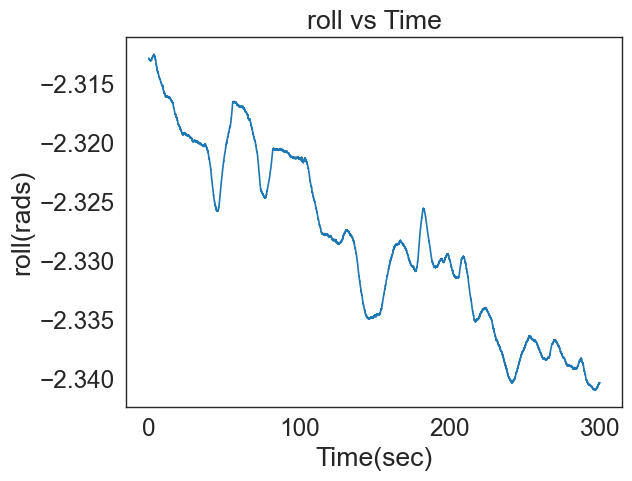

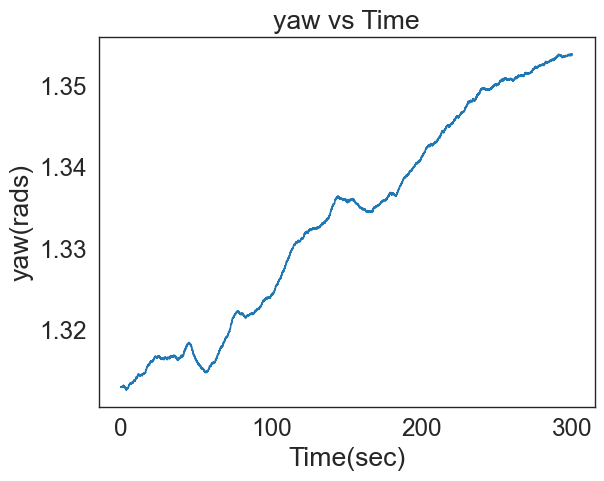

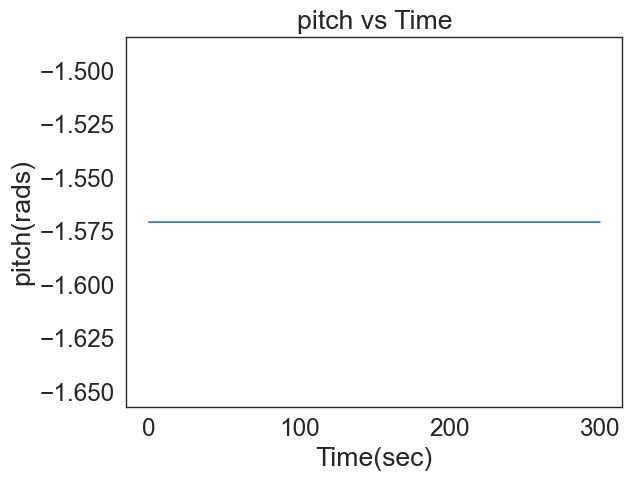

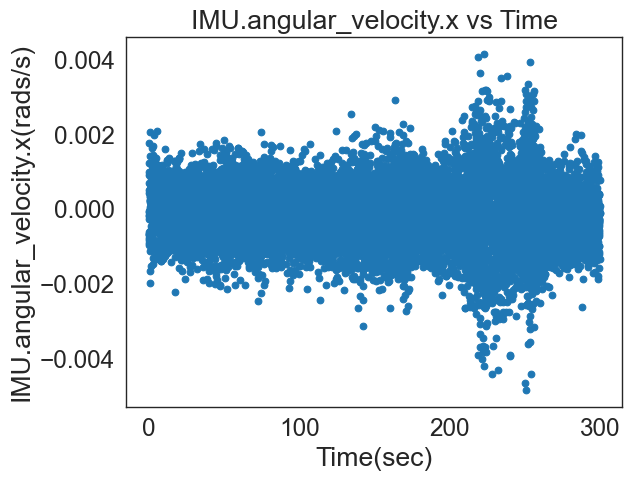

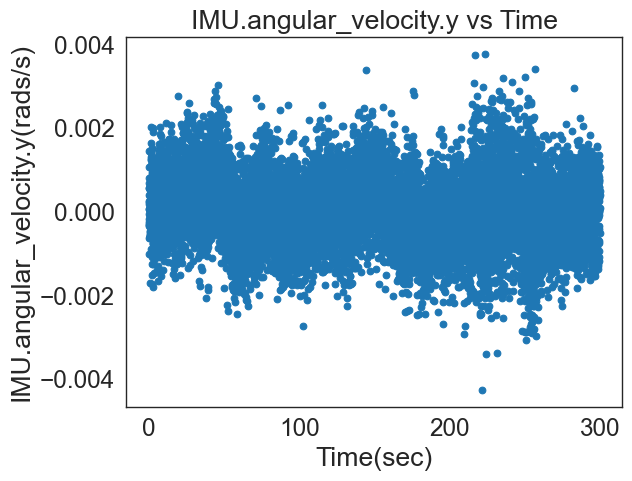

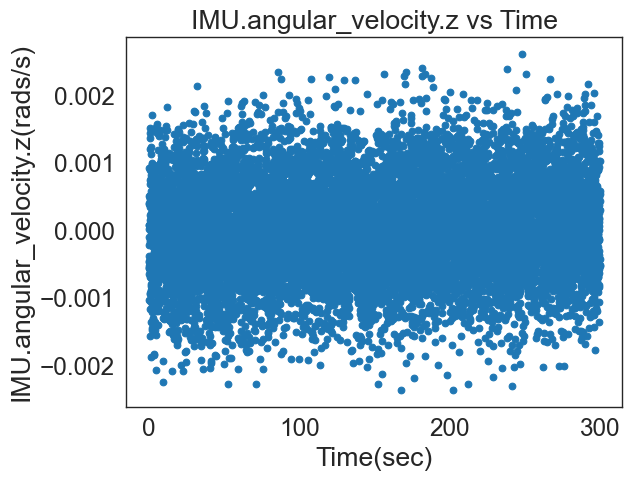

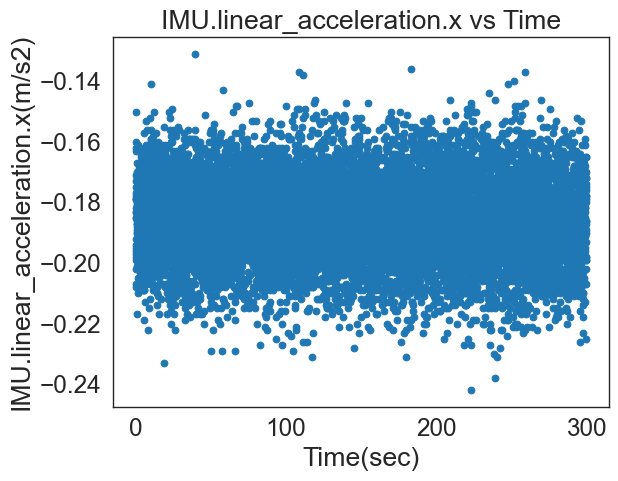

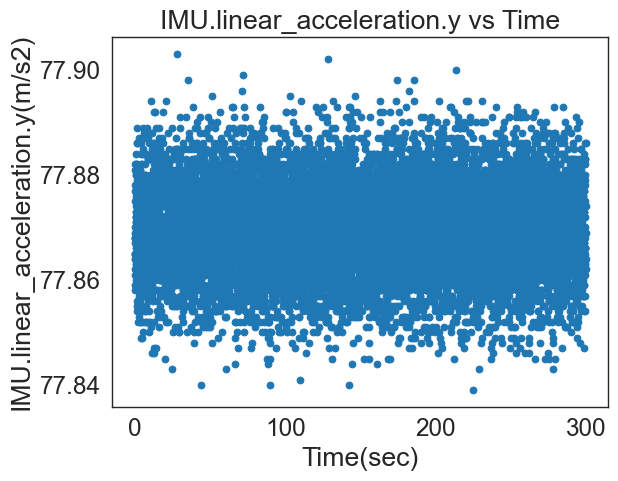

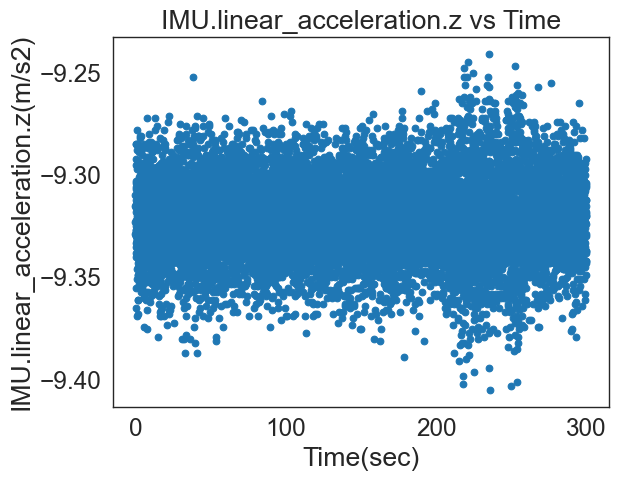

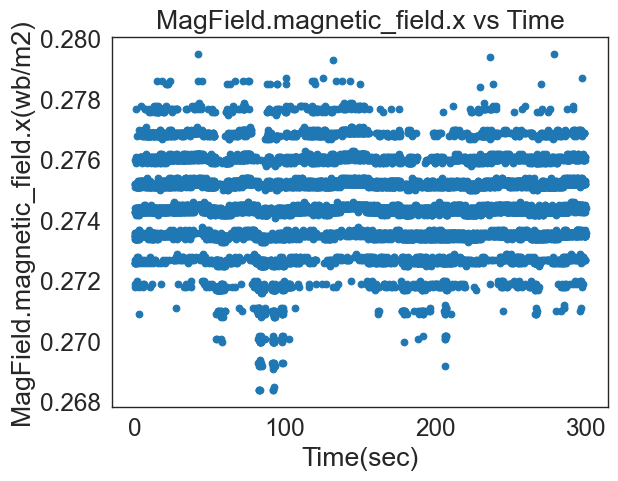

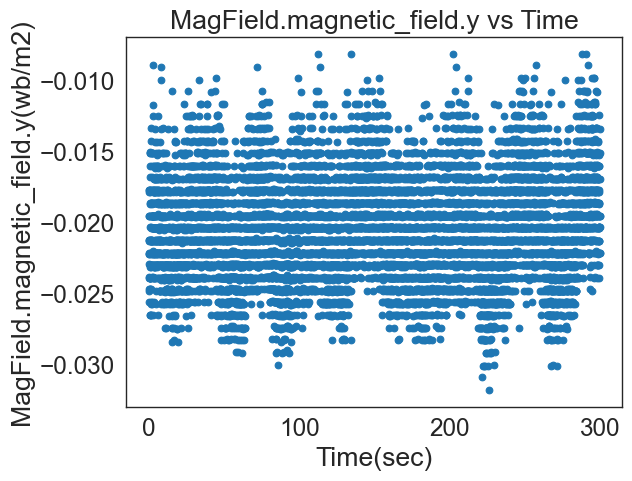

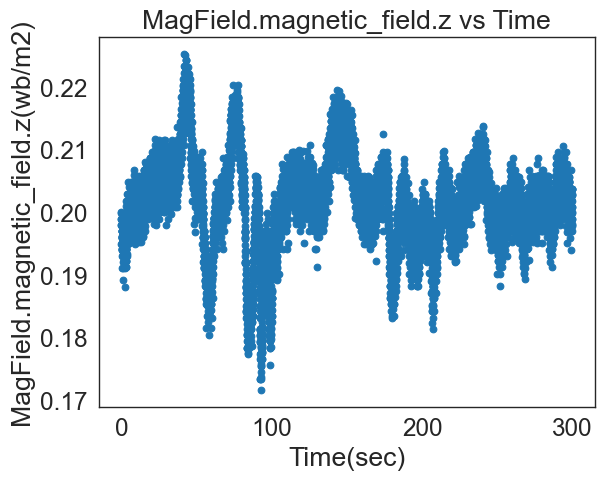

In [37]:
for col, unit, flag in zip(cols, col_units, flags):
    plot_graph('Time', col, 'sec', unit, flag)

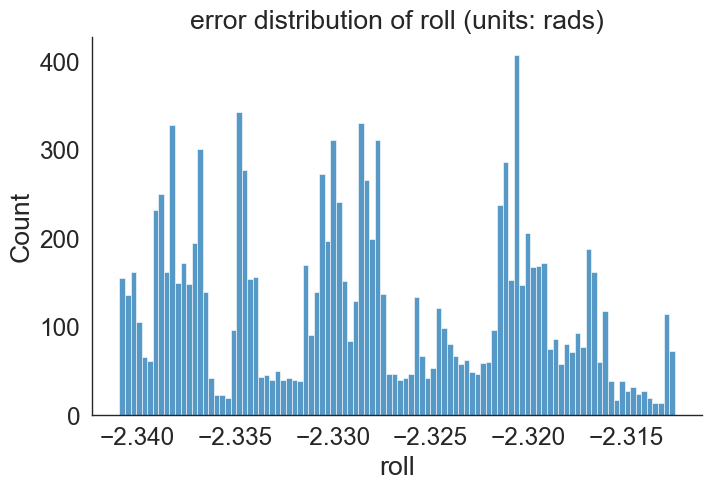

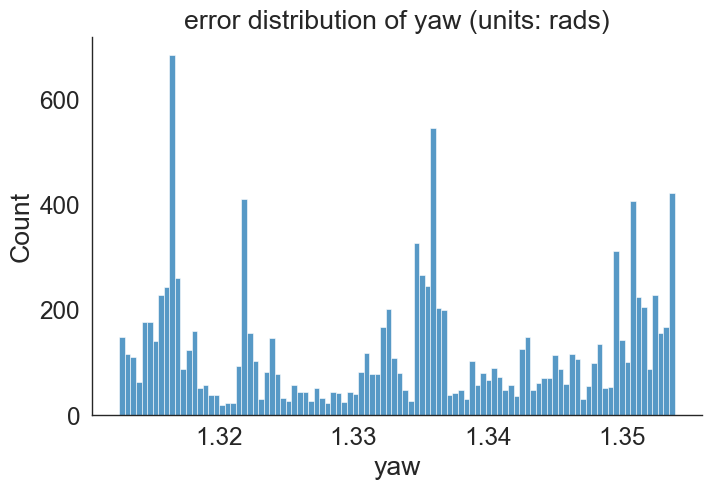

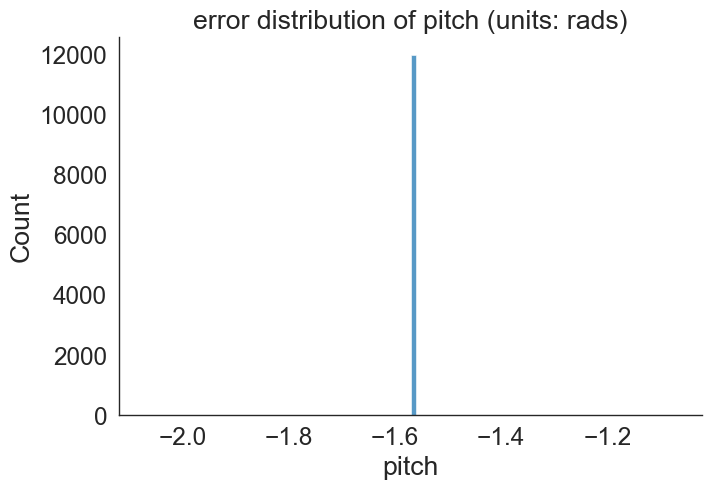

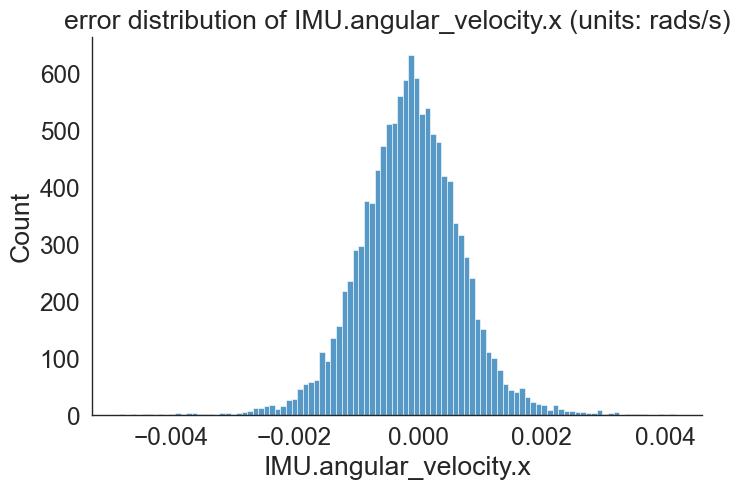

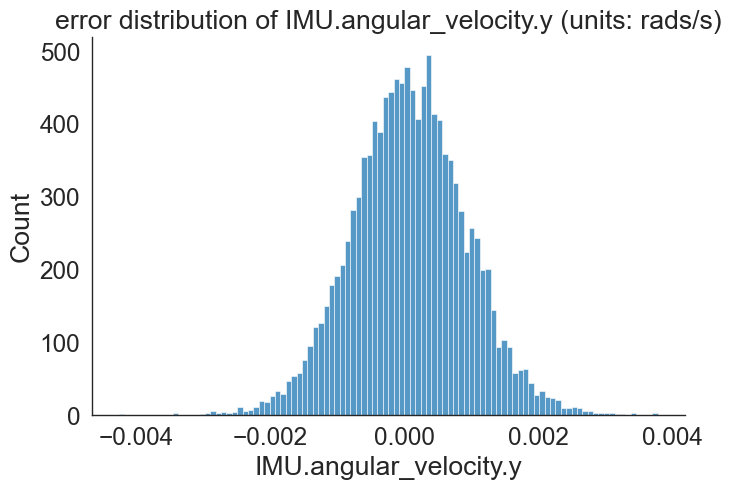

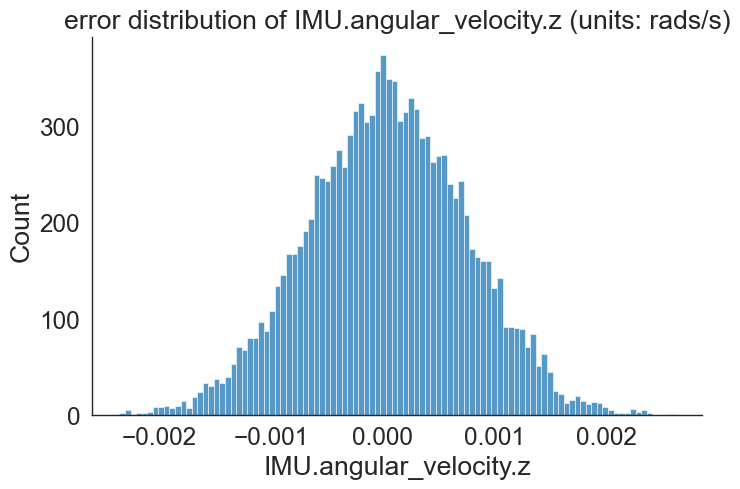

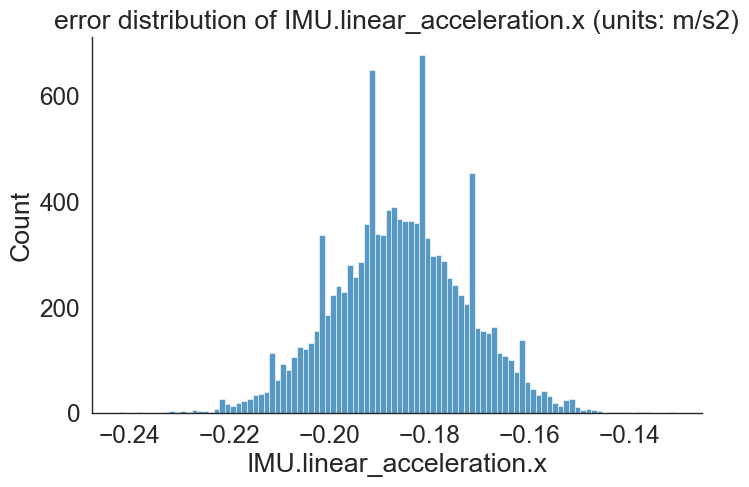

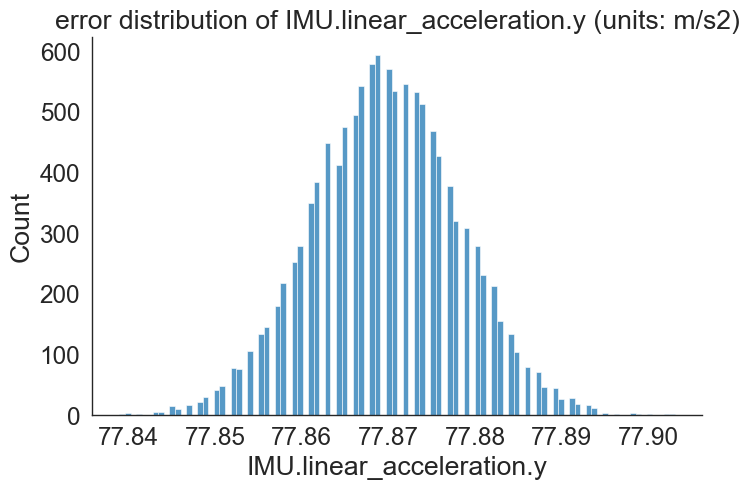

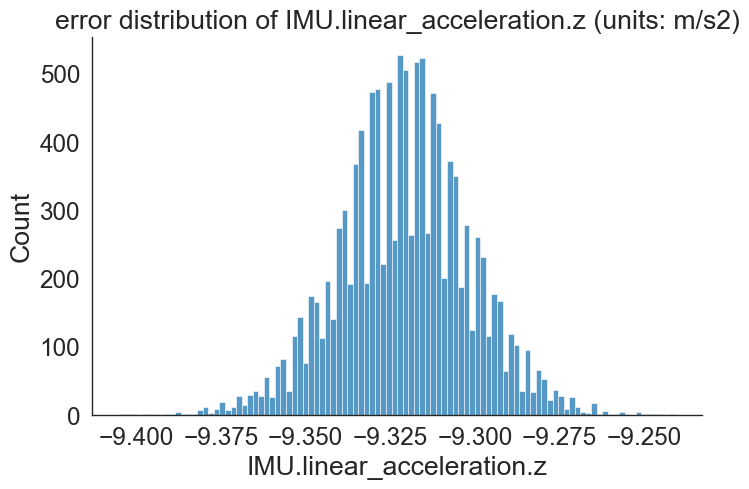

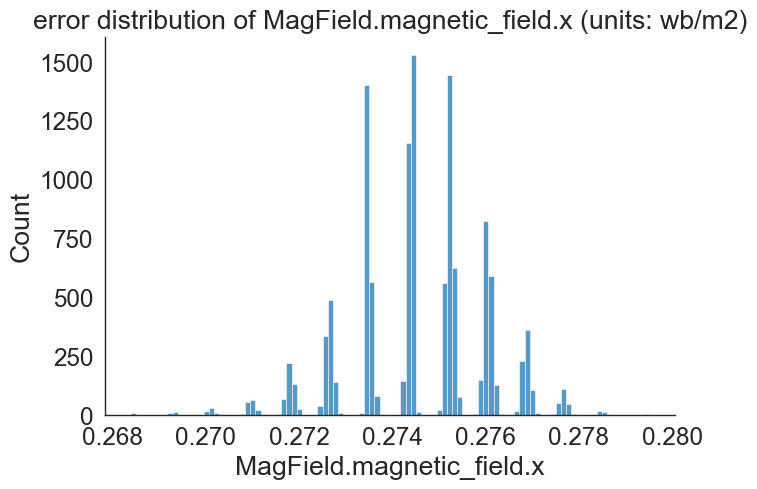

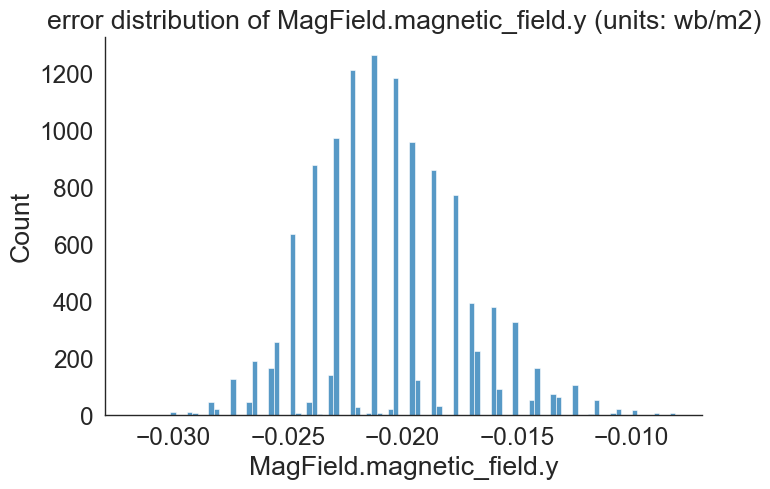

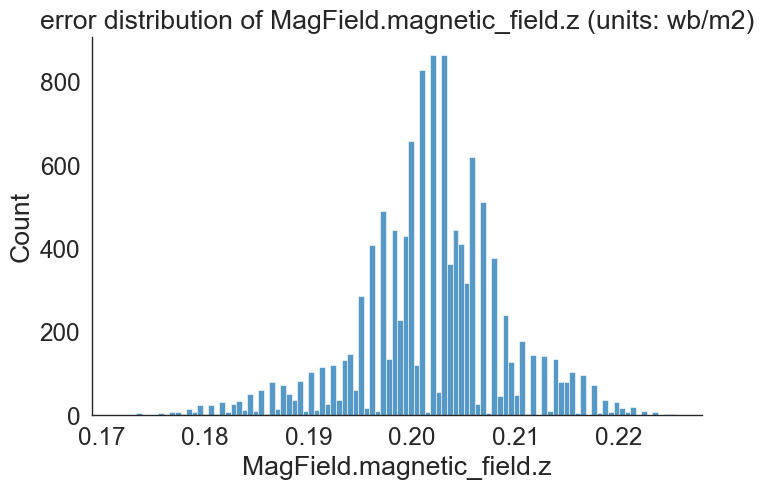

In [38]:
for col, unit in zip(cols, col_units):
    plot_histogram(col, unit)

In [41]:
for col in cols:
    mean, std = get_mean_std(col)
    print(f"{col} mean & std: {mean:.4f} & {std:.4f}")

roll mean & std: -2.3284 & 0.0077
yaw mean & std: 1.3337 & 0.0133
pitch mean & std: -1.5708 & 0.0000
IMU.angular_velocity.x mean & std: -0.0001 & 0.0008
IMU.angular_velocity.y mean & std: 0.0001 & 0.0008
IMU.angular_velocity.z mean & std: 0.0000 & 0.0007
IMU.linear_acceleration.x mean & std: -0.1858 & 0.0133
IMU.linear_acceleration.y mean & std: 77.8696 & 0.0084
IMU.linear_acceleration.z mean & std: -9.3208 & 0.0193
MagField.magnetic_field.x mean & std: 0.2746 & 0.0014
MagField.magnetic_field.y mean & std: -0.0206 & 0.0034
MagField.magnetic_field.z mean & std: 0.2018 & 0.0070
